In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina', 'pdf')
plt.rcParams['figure.dpi'] = 100

In [3]:
import sys
sys.path.append('..')

In [5]:
from sindy import SINDy
from sindy.differentiation import TVR, FastTVR
from sindy.optimizers import STLSQ, Lasso
from sindy.features import PolynomialFeatures
from sindy.utils import odes, GaussianNoise, gen_data
from sindy.utils.plot import plot_data


# Система линейных уравнений

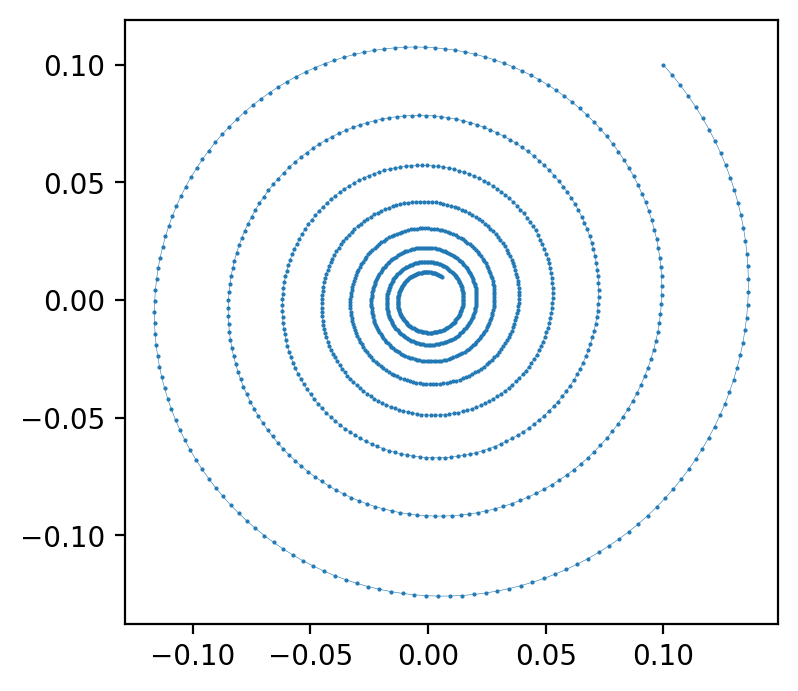

In [18]:
data, t = gen_data(odes.linear, (0, 25), 50, odes.linear.u0)
plot_data(data, t, ax_kwargs=dict(aspect='equal'))

[(1e-06, 0.00017306896551724137), (1e-06, 0.00017306896551724137), (1.820689655172414e-05, 0.00017306896551724137), (1.820689655172414e-05, 0.00015586206896551724)]


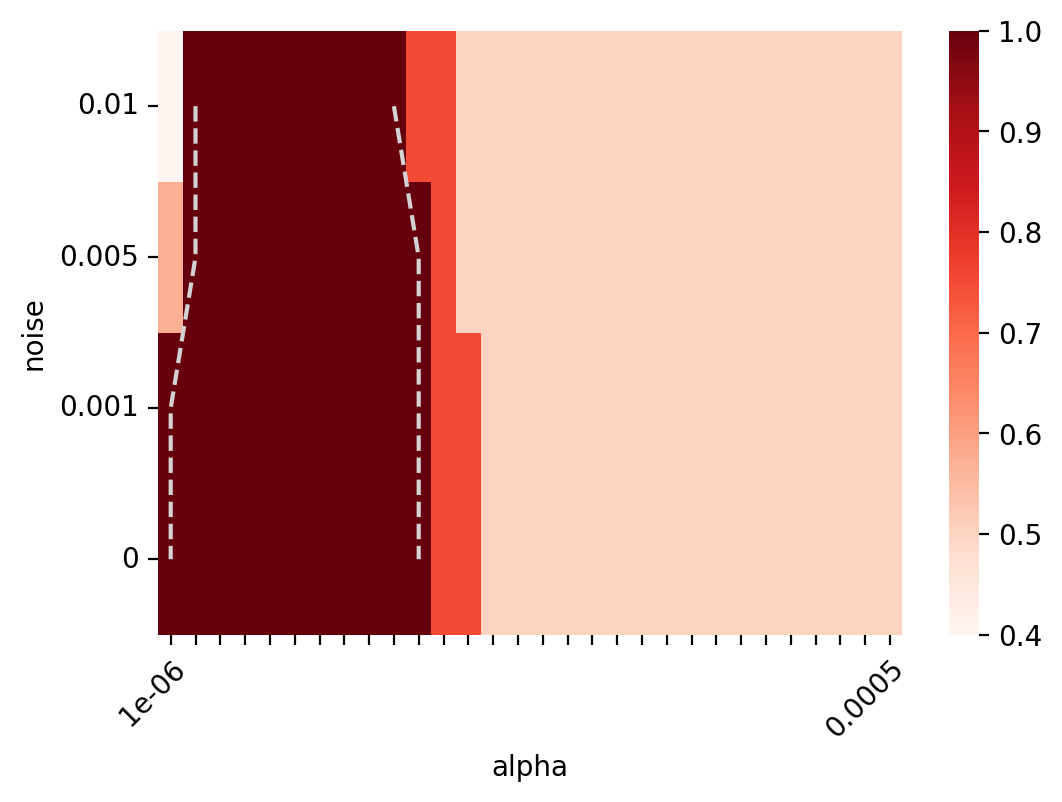

In [31]:
plot_iou_over_noise_arg(data, t, odes.linear.terms, 
                        SINDy(Lasso(), FastTVR(), PolynomialFeatures(2, include_bias=False)),
                        'alpha', np.linspace(1e-6, 5e-4, 30),
                        [0, 0.001, 0.005, 0.01],
                        [dict(dif__alpha=1e-8), dict(dif__alpha=1e-8), dict(dif__alpha=1e-8), dict(dif__alpha=5e-8)], verbose=True)

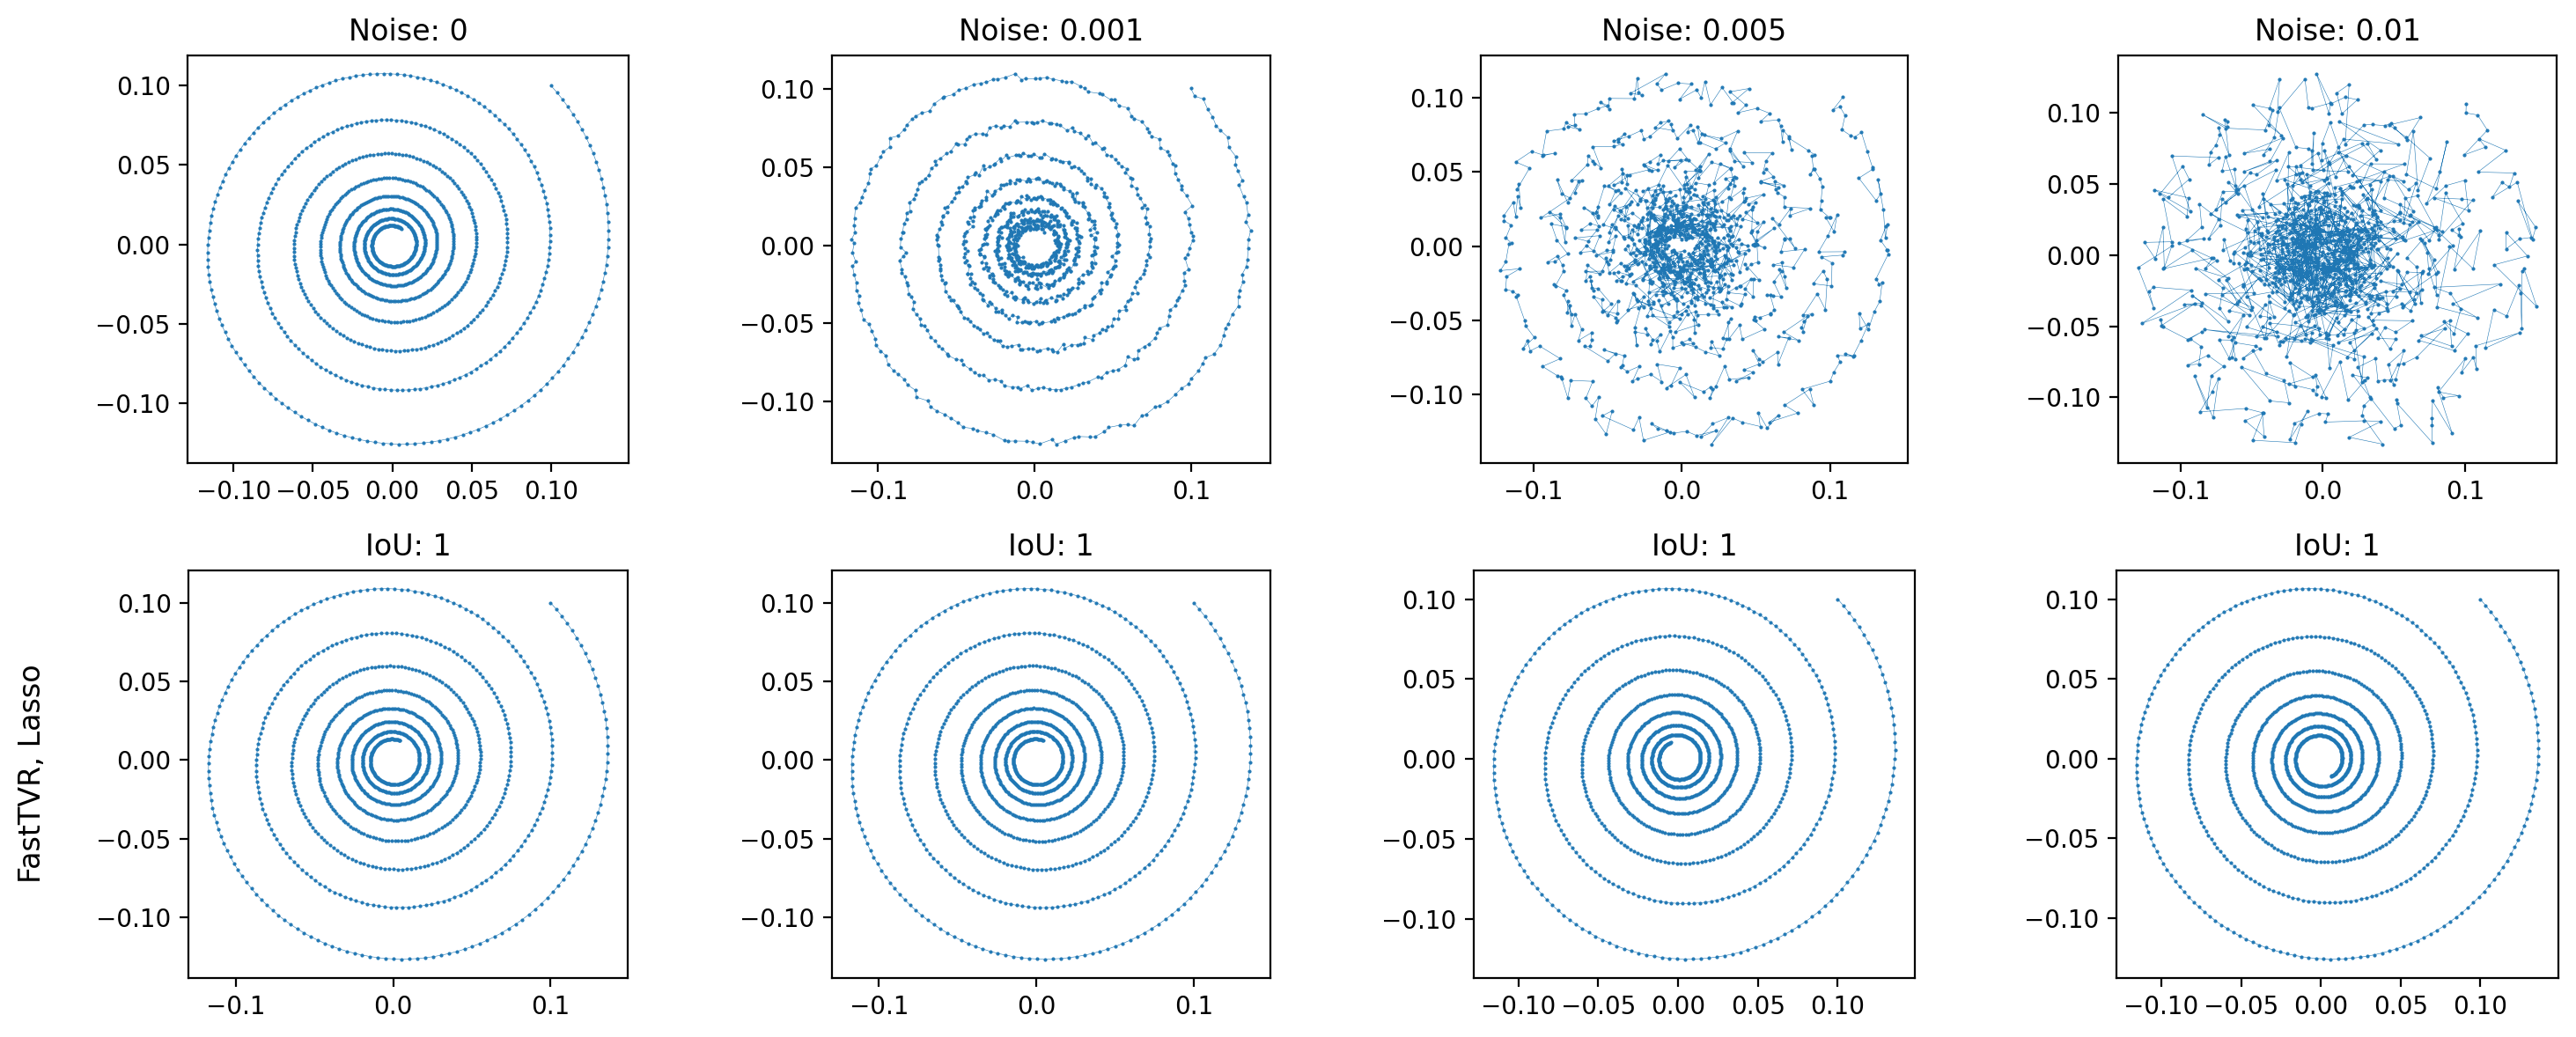

In [14]:
plot_results(data, t, odes.linear.u0, odes.linear.terms,
             {'FastTVR, Lasso': SINDy(Lasso(1e-5), FastTVR(), PolynomialFeatures(2, include_bias=False))},
             [0, 0.001, 0.005, 0.01],
             [[dict(dif__alpha=1e-8), dict(dif__alpha=1e-8), dict(dif__alpha=1e-8), dict(dif__alpha=5e-8)]], 
             size=(3, 3), ax_kwargs={'aspect': 'equal'})

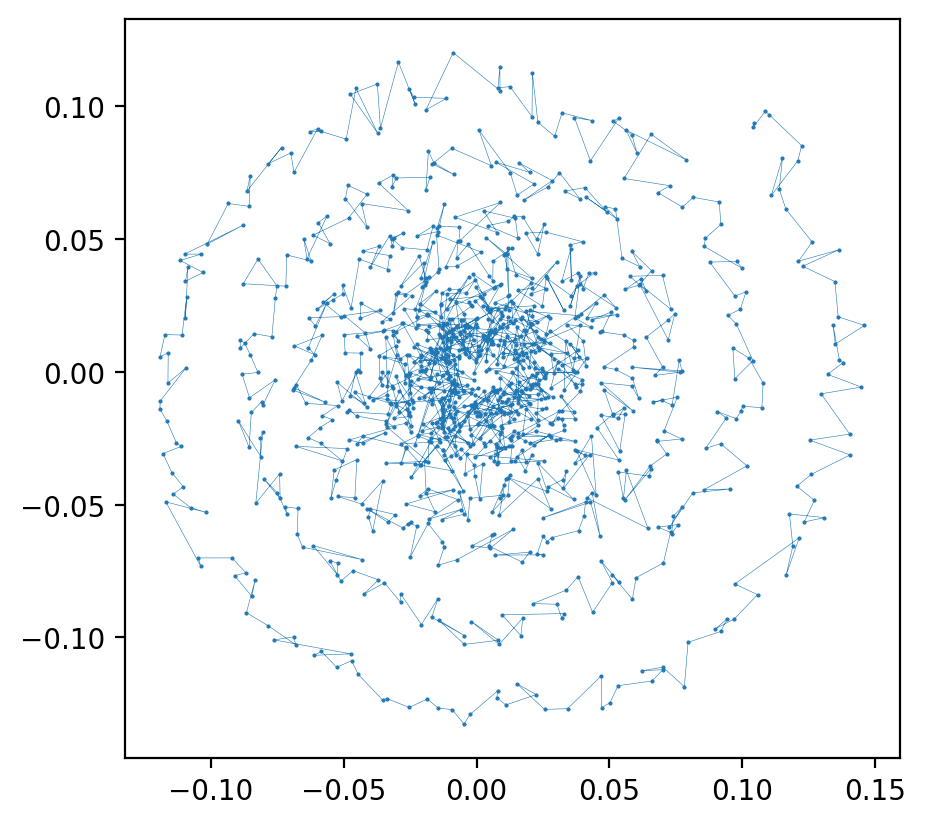

dx1 = -0.119496 * x1 + 1.96813 * x2
dx2 = -1.94056 * x1 + -0.0622096 * x2



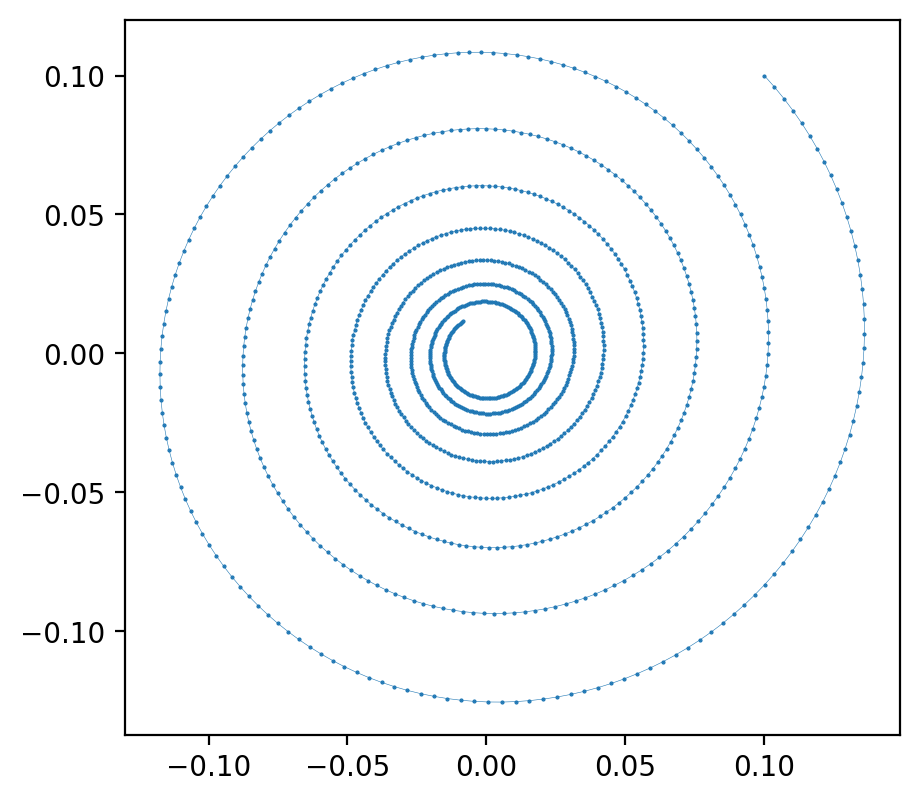

In [21]:
noise_data = GaussianNoise(scale=0.005).transform(data)
plot_data(noise_data, t, figsize=(5, 5), ax_kwargs={'aspect': 'equal'})

s = SINDy(Lasso(alpha=1e-5), FastTVR(alpha=1e-8), PolynomialFeatures(2, include_bias=False))
s.fit(noise_data, t)
print(s.print_equation(fmt='g'))

eq = s.get_equation()
id_data, _ = gen_data(eq, t, 50, odes.linear.u0)
plot_data(id_data, t, figsize=(5, 5), ax_kwargs={'aspect': 'equal'})

# Система Мура-Шпигеля

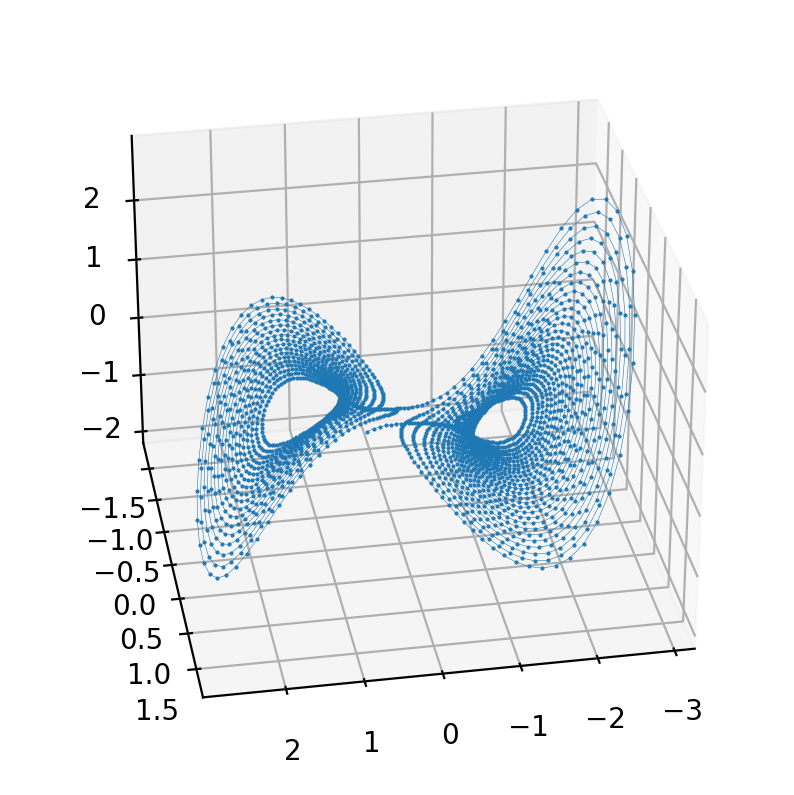

In [29]:
data, t = gen_data(odes.moore_spiegel, (600, 900), 10, odes.moore_spiegel.u0)
plot_data(data, t, figsize=(5, 5), azim=80)

In [38]:
from sindy.utils.plot import plot_dif_results

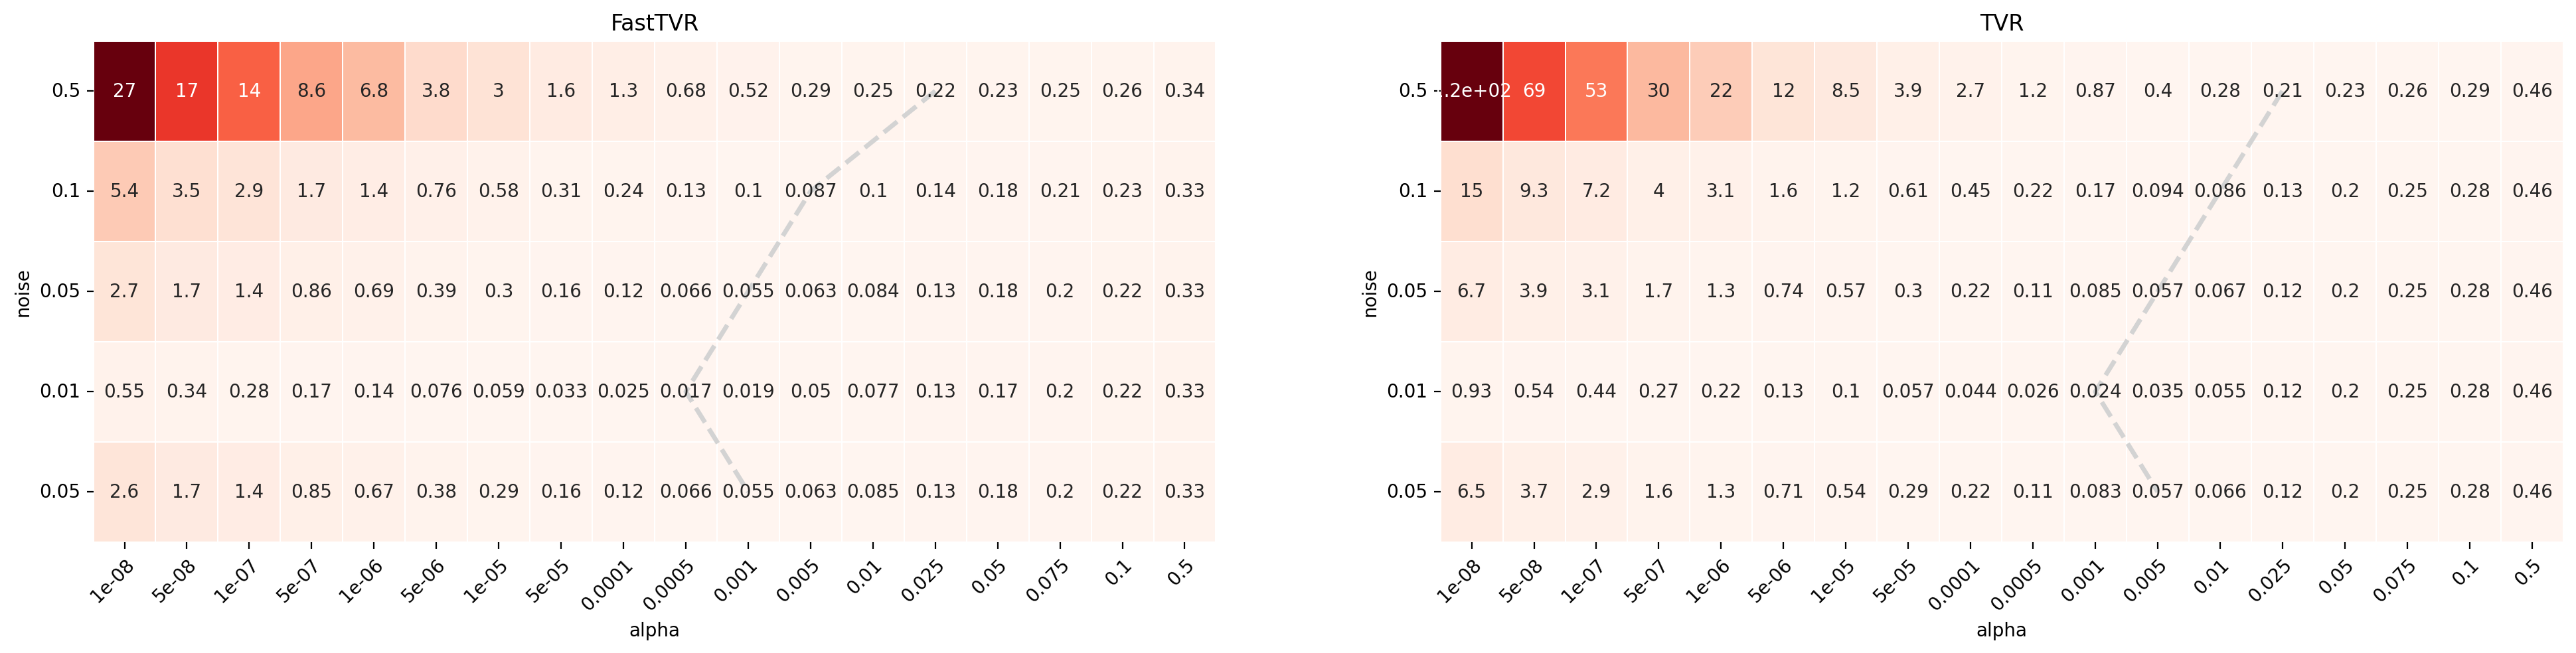

In [51]:
tvr = TVR()
fast_tvr = FastTVR()

noise = [0.05, 0.01, 0.05, 0.1, 0.5]
alpha = np.array([1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4, 5e-4, 0.001, 0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.5])

fig = plt.figure(figsize=(24, 5))
ax = fig.subplots(1, 2)

ax[0].set_title('FastTVR')
error = plot_dif_test_arg_noise(data, (600, 900), 10, fast_tvr, 'alpha', alpha, noise, repeat=1, return_error=True, ax=ax[0], cbar=False, verbose=True)

ax[1].set_title('TVR')
error = plot_dif_test_arg_noise(data, (600, 900), 10, tvr, 'alpha', alpha, noise, repeat=1, return_error=True, ax=ax[1], cbar=False, verbose=True)
plt.show()

In [76]:
noise_values = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
fast_tvr_params = [{'dif__alpha': 0.0001}, {'dif__alpha': 0.0001}, {'dif__alpha': 0.0005, 'optim__threshold': 0.08}, {'dif__alpha': 0.0005}, {'dif__alpha': 0.001}, {'dif__alpha': 0.005, 'optim__threshold': 0.07}]
tvr_params = [{'dif__alpha': 1.0e-07}, {'dif__alpha': 1.0e-04}, {'dif__alpha': 5.0e-04, 'optim__threshold': 0.012}, {'dif__alpha': 1.0e-03, 'optim__threshold': 0.15}, {'dif__alpha': 5.0e-03}, {'dif__alpha': 0.01}]

[(0.00929145728643216, 0.011381909547738694), (0.009412060301507538, 0.011100502512562813)]


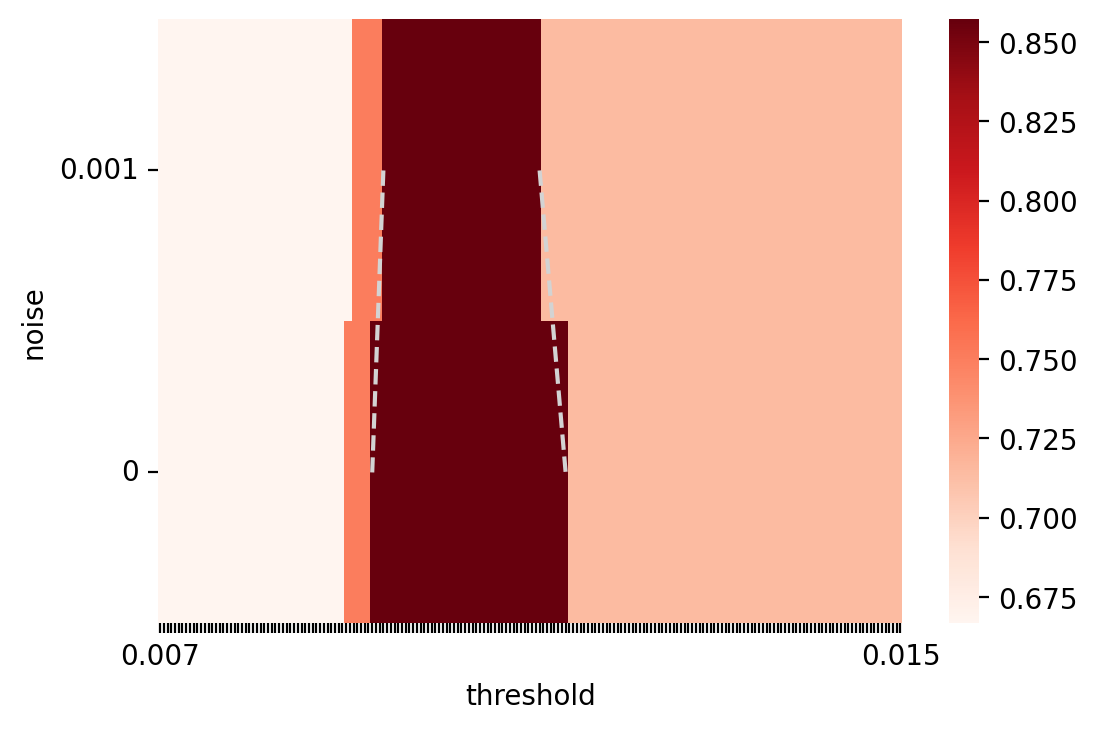

[(0.01949748743718593, 0.1), (0.023115577889447236, 0.1), (0.08417085427135679, 0.1), (0.04618090452261307, 0.08326633165829146), (0.05839195979899498, 0.1)]


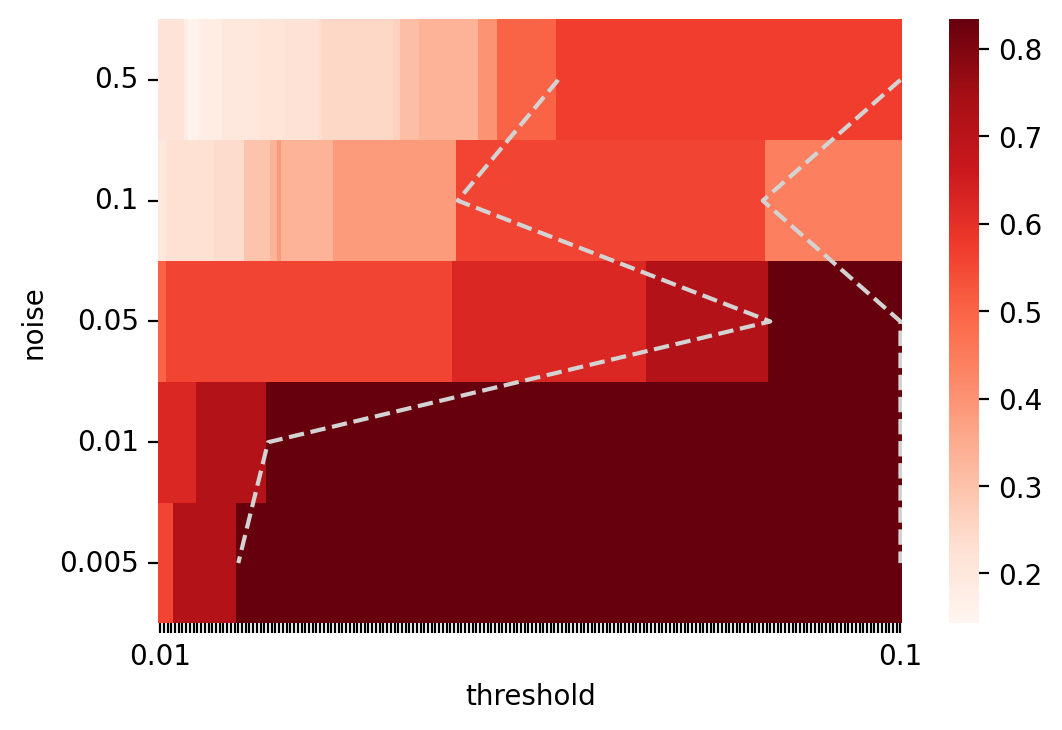

In [63]:
plot_iou_over_noise_arg(data, t, odes.moore_spiegel.terms, 
                        SINDy(STLSQ(), FastTVR(), PolynomialFeatures(3)),
                        'threshold', np.linspace(0.007, 0.015, 200),
                        noise_values[:2], fast_tvr_params)
plot_iou_over_noise_arg(data, t, odes.moore_spiegel.terms, 
                        SINDy(STLSQ(), FastTVR(), PolynomialFeatures(3)),
                        'threshold', np.linspace(0.01, 0.1, 200),
                        noise_values[2:], fast_tvr_params)

[(0.008718120805369128, 0.010865771812080538), (0.008395973154362416, 0.011080536912751678), (0.010865771812080538, 0.015)]


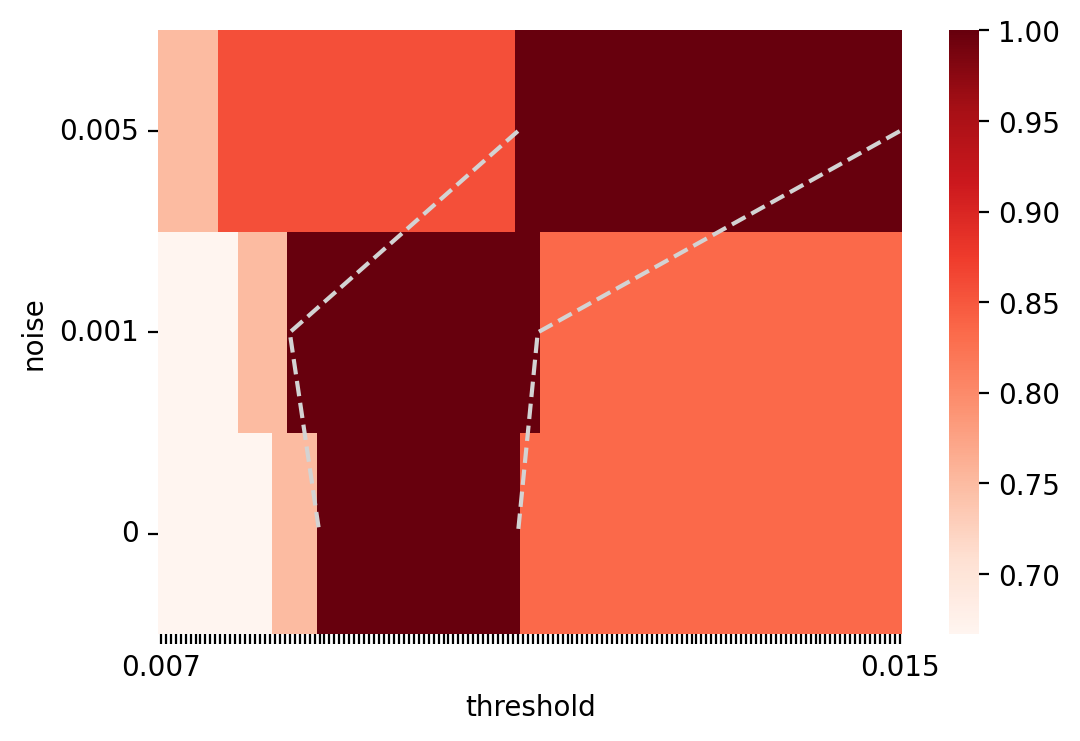

[(0.0125503355704698, 0.1846979865771812), (0.03550335570469799, 0.14644295302013424), (0.09798657718120804, 0.2), (0.07885906040268456, 0.09543624161073824)]


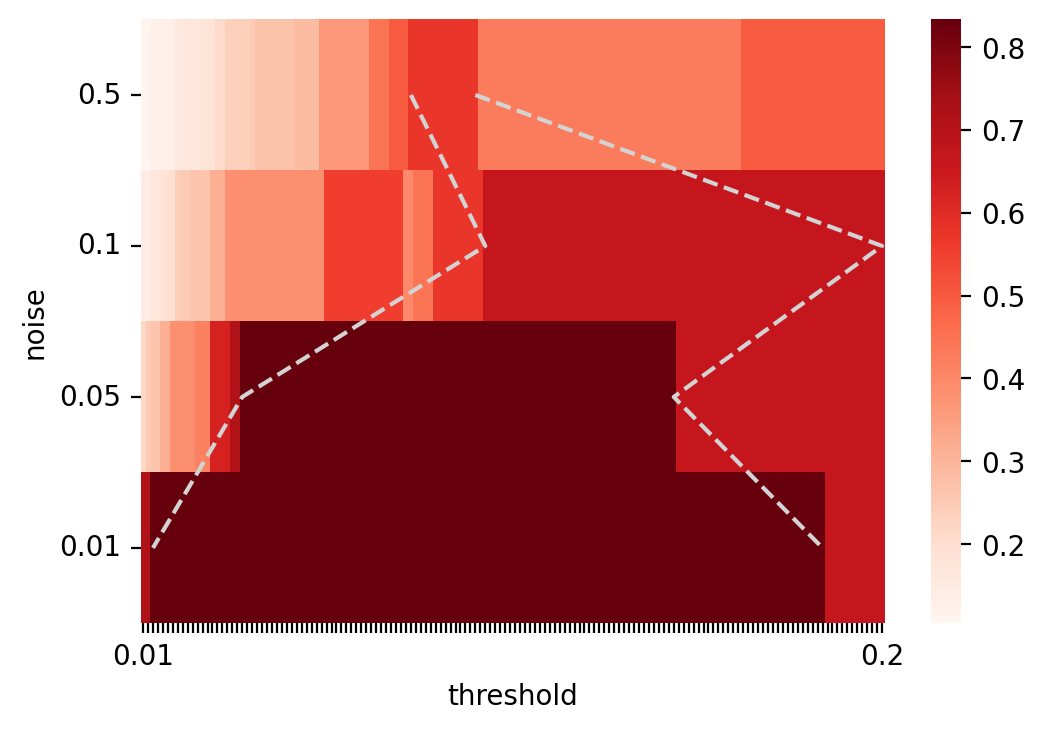

In [64]:
plot_iou_over_noise_arg(data, t, odes.moore_spiegel.terms, 
                        SINDy(STLSQ(), TVR(), PolynomialFeatures(3)),
                        'threshold', np.linspace(0.007, 0.015, 150),
                        noise_values[:3], tvr_params)
plot_iou_over_noise_arg(data, t, odes.moore_spiegel.terms, 
                        SINDy(STLSQ(), TVR(), PolynomialFeatures(3)),
                        'threshold', np.linspace(0.01, 0.2, 150),
                        noise_values[3:], fast_tvr_params)

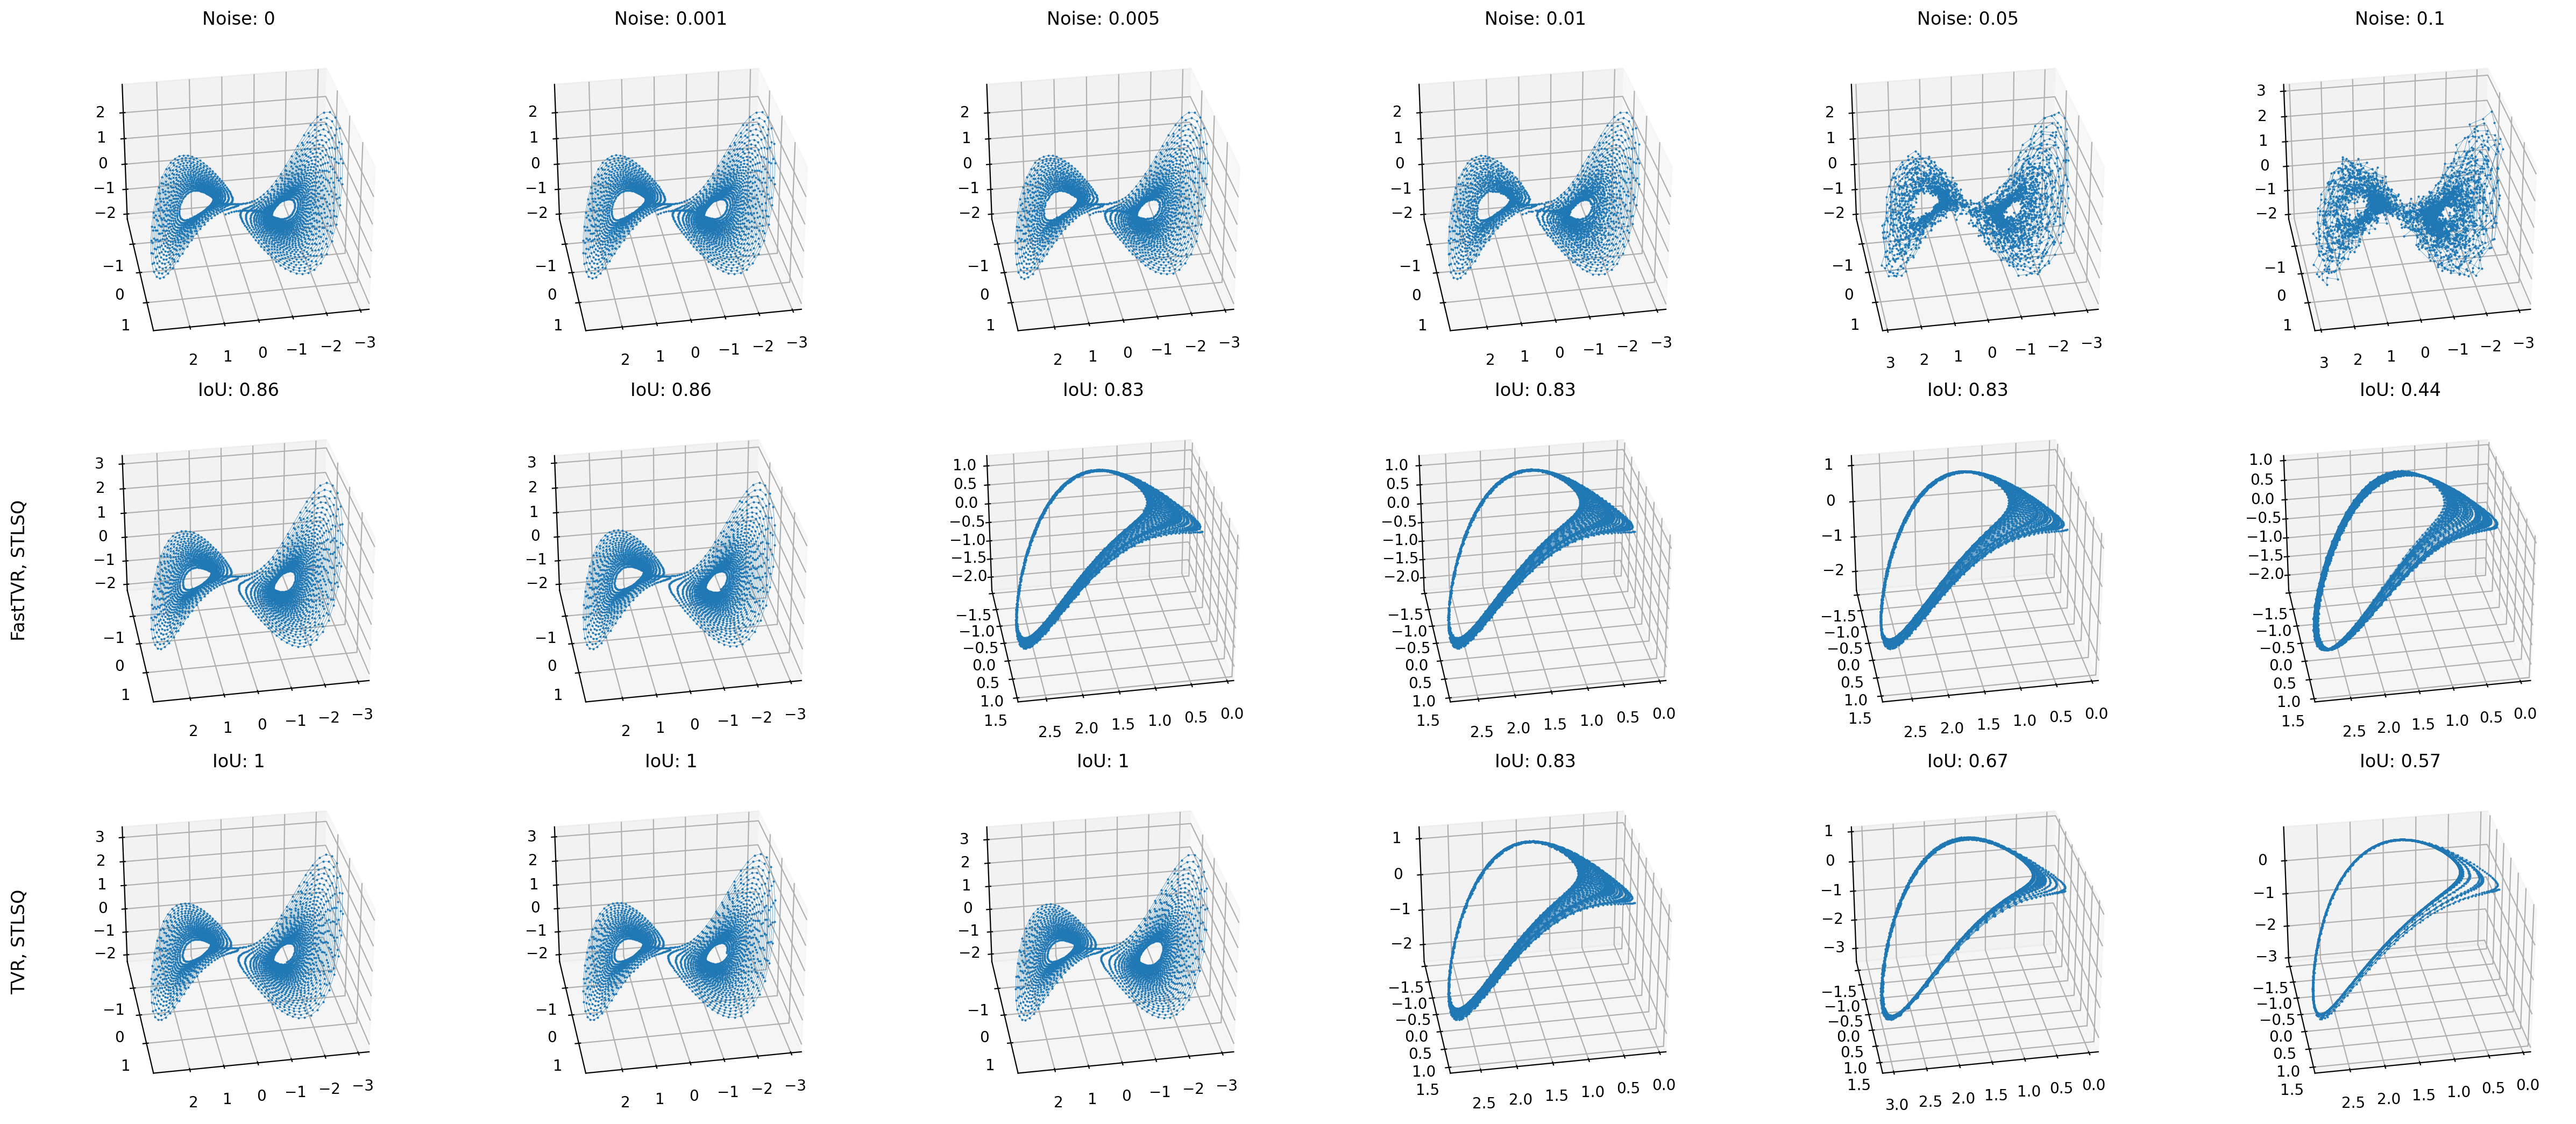

In [77]:
coefs = plot_results(data, t, odes.moore_spiegel.u0, odes.moore_spiegel.terms,
                     {'FastTVR, STLSQ': SINDy(STLSQ(0.01), FastTVR(), PolynomialFeatures(3)),
                     'TVR, STLSQ': SINDy(STLSQ(0.01), TVR(), PolynomialFeatures(3))},
                     noise_values, [fast_tvr_params, tvr_params],
                     size=(3.5, 3.5), verbose=True, return_coefs=True, azim=80)

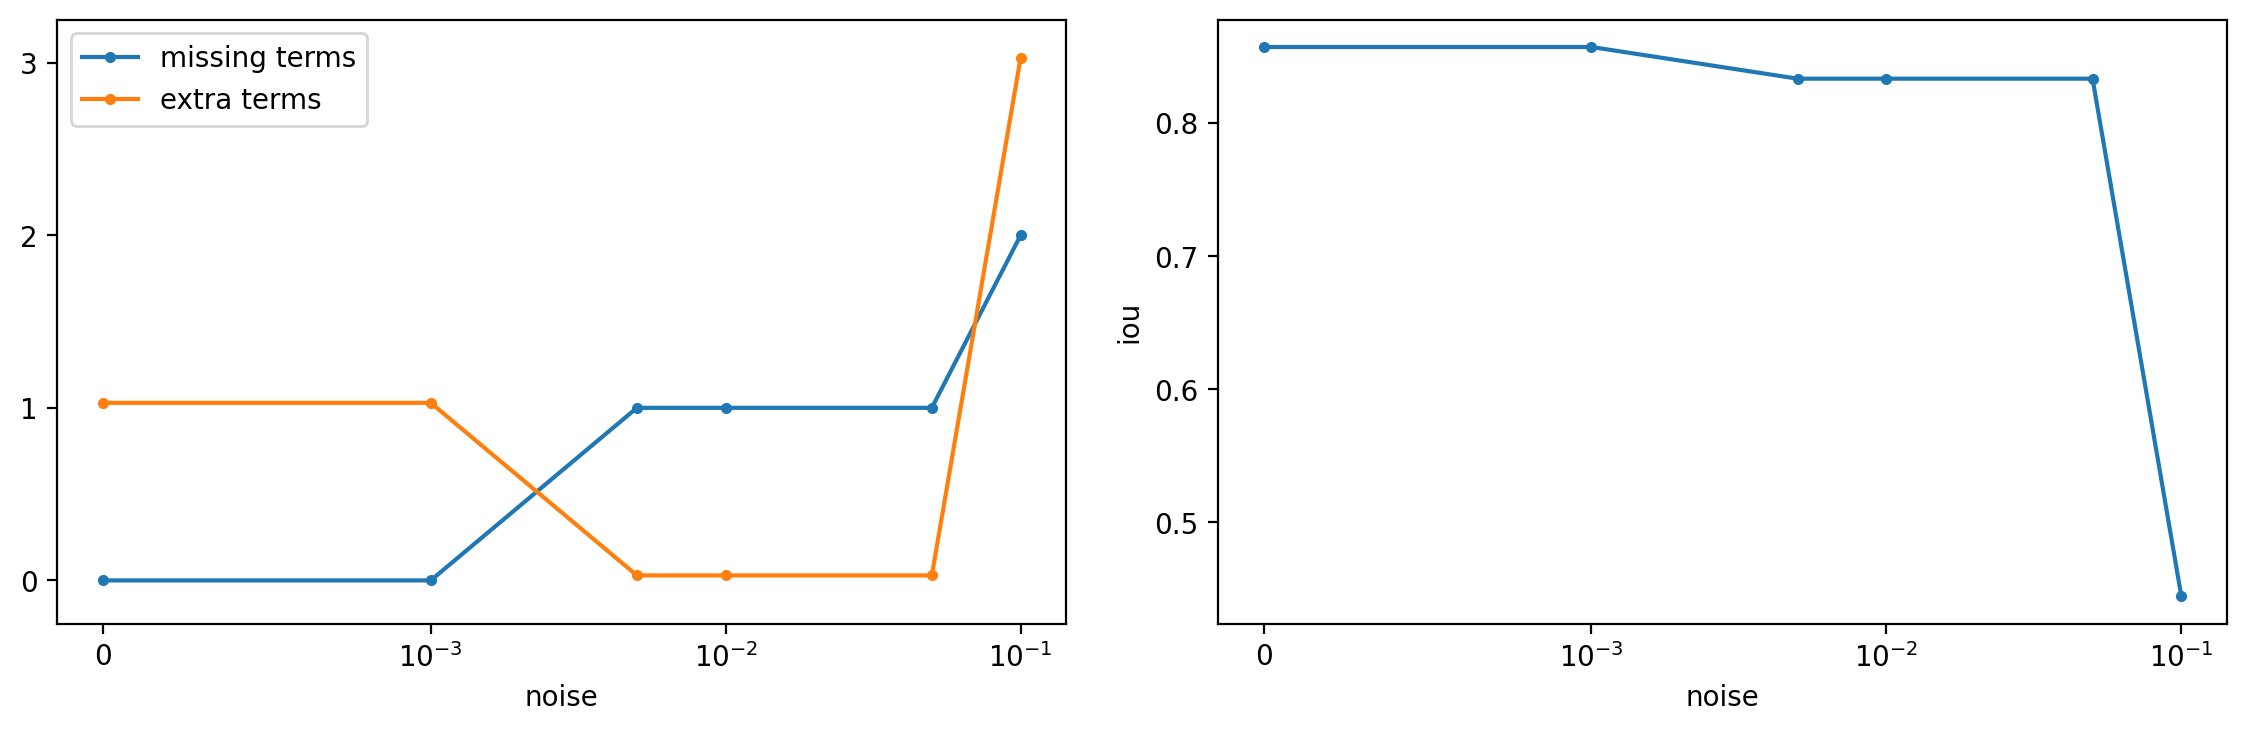

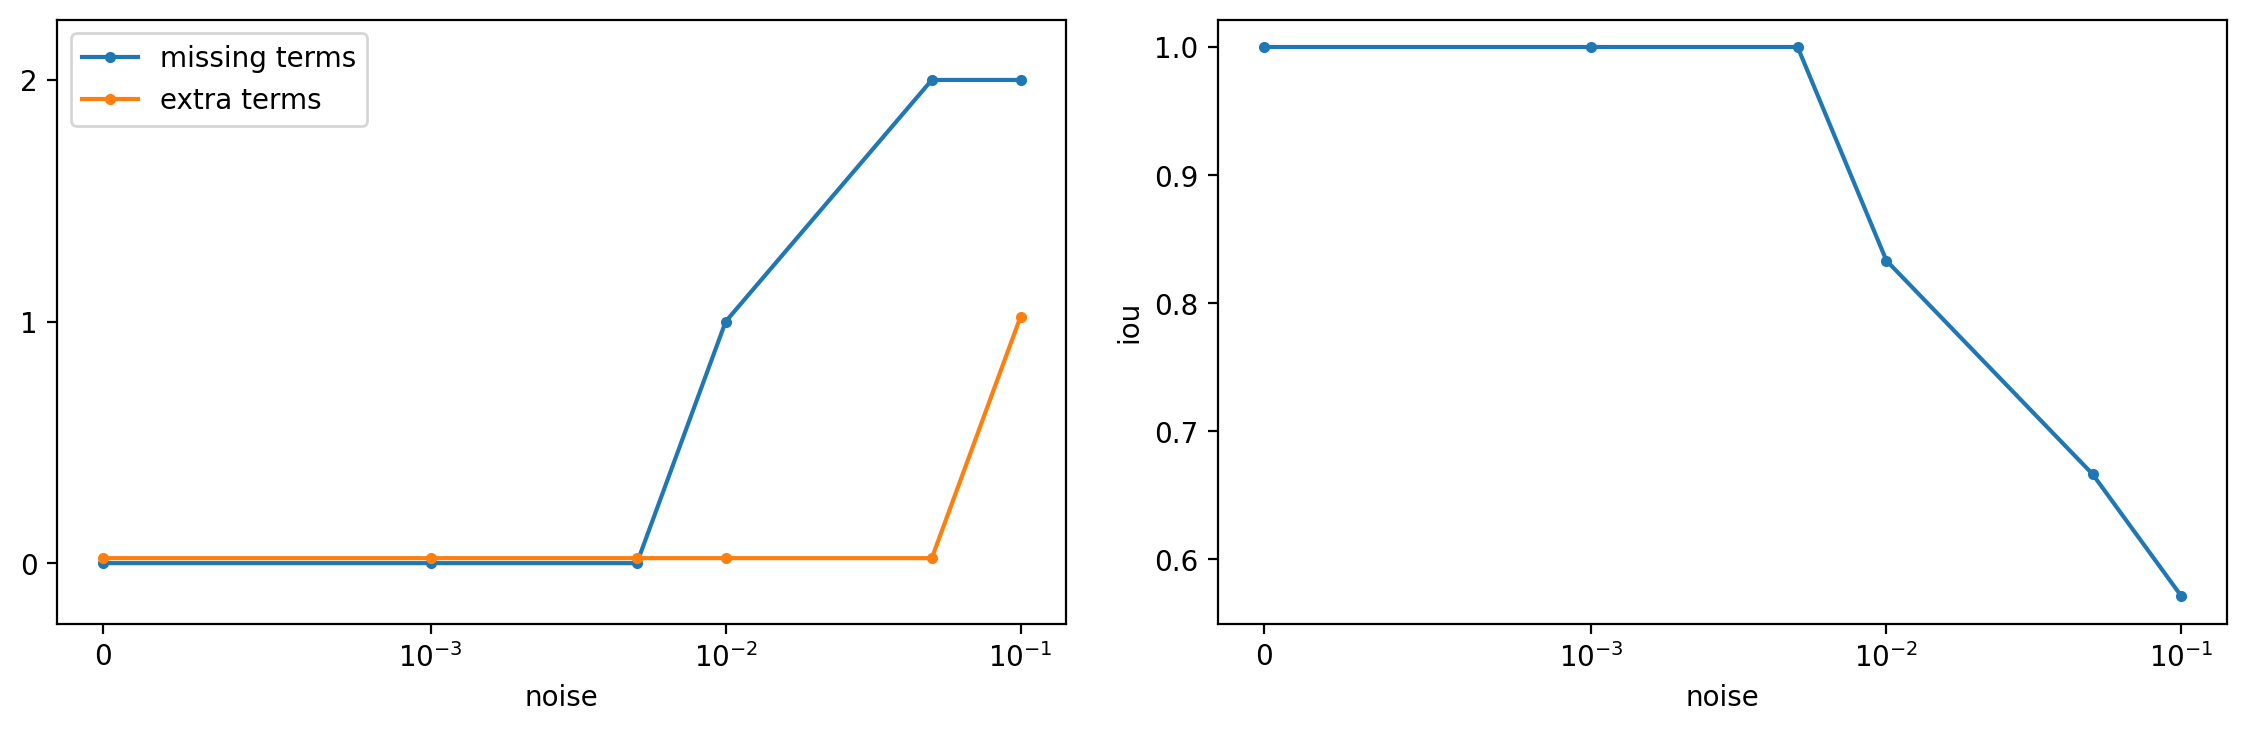

In [78]:
plot_sindy_scores(odes.moore_spiegel.terms, coefs[0], 
                  PolynomialFeatures(3),
                  [0, 0.001, 0.005, 0.01, 0.05, 0.1])
plot_sindy_scores(odes.moore_spiegel.terms, coefs[1], 
                  PolynomialFeatures(3),
                  [0, 0.001, 0.005, 0.01, 0.05, 0.1])

In [79]:
s = SINDy(STLSQ(0.01), FastTVR(1e-8), PolynomialFeatures(3)).fit(data, t)
for coef in coefs[1]:
    s.coef_ = coef
    print(s.print_equation(fmt='g'))

dx1 = 0.977747 * x2
dx2 = -0.186353 * x1 + 0.975397 * x3
dx3 = 0.99205 * x2 + -0.021043 * x3 + -0.798484 * x1^2 x2

dx1 = 0.976642 * x2
dx2 = -0.186374 * x1 + 0.975993 * x3
dx3 = 0.992841 * x2 + -0.0209123 * x3 + -0.798688 * x1^2 x2

dx1 = 0.984113 * x2
dx2 = -0.185125 * x1 + 0.977645 * x3
dx3 = 1.00627 * x2 + -0.0205423 * x3 + -0.801622 * x1^2 x2

dx1 = 0.982455 * x2
dx2 = -0.186651 * x1 + 0.97923 * x3
dx3 = 1.04622 * x2 + -0.80955 * x1^2 x2

dx1 = 0.962712 * x2
dx2 = 0.947985 * x3
dx3 = 0.90004 * x2 + -0.729239 * x1^2 x2

dx1 = 0.904667 * x2
dx2 = 0.916891 * x3
dx3 = 0.757316 * x2 + -0.64204 * x1^2 x2 + -0.166827 * x2 x3^2

